In [23]:
%matplotlib notebook
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy.linalg import hilbert
from scipy.linalg import lu
from scipy import linalg as LA

### Erste Programmieraufgabe:

In [162]:
def regularfalsi(f,a,b,tol):
    x = np.zeros(1, dtype=float)
    abbruch = 0
    i = 0
    x[i]= a-(f(a)*(b-a)/(f(b)-f(a)))
    while abbruch != 3:
        if x[i] > 0:
            b = x[i]
        if x[i] < 0:
            a = x[i]
        elif x[i] == 0:
            print("Das regular Falsi Verfahren kann bei der Eingabe nicht angewandt werden.")
        i += 1
        x = np.append(x,(a*f(b)-b*f(a))/(f(b)-f(a)))
        
        if np.abs(x[i-1]-x[i])<tol:
            abbruch += 1  
        else:
            abbruch = 0
    n = np.shape(x)
    #test = x[n[0]-2] - x[n[0]-1]
    #print(test)
    #print(x[n[0]-3])
    #print(x[n[0]-2])
    return x[n[0]-1]

<IPython.core.display.Javascript object>


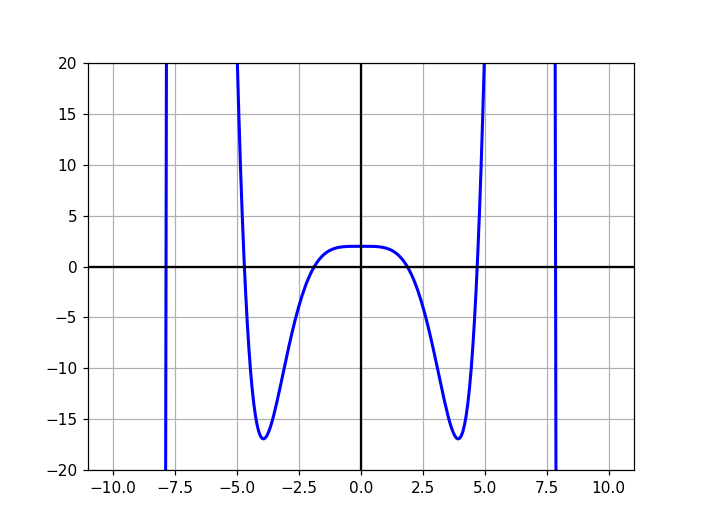

Bei den gewählten Parametern ist die Nullstelle zu 1.875104068707315 angenährt.


In [168]:
# Funktion definieren
def f(x):
    y = 1+(np.cos(x)*np.cosh(x))
    return y

# Funktionsplott der Funktion f(x) = 1 + cos(x)*cosh(x)
x = np.linspace(-10,10,300)
plt.plot(x, 1+(np.cos(x)*np.cosh(x)), color = 'blue', linewidth=2)
plt.ylim(-20, 20) # Wertebereich
plt.grid() # Hintergrundgitter
plt.axvline(x=0, color='black', linestyle='-')
plt.axhline(y=0, color='black', linestyle='-')
plt.show() 


# Regular Falsi Funktion aufrufen
x = regularfalsi(f,1,3,1*10e-12) #um die 10te Stelle richtig zu haben muss die Toleranz größer als 10e-10 gewählt werden
print("Bei den gewählten Parametern ist eine Nullstelle zu",x, "angenährt.")
# Auf 10 Stellen genau wäre:
# 1.8751040687 062754